## Лабораторная работа №1 | Вариант 4

Выполнил: 

### 1. Numpy

In [6]:
import numpy as np

1. Найти индексы не нулевых элементов массива [1,2,0,0,4,0]

In [2]:
arr = [1, 2, 0, 0, 4, 0]
non_zero = np.nonzero(arr)

2. Создайте единичную матрицу размером 3х3

In [ ]:
a = np.eye(3)

3. Создайте матрицу-шахматную доску 8х8 используя функцию `tile`

In [ ]:
chess = np.tile([[' ','*'],
                 ['*',' ']], (4, 4))

4. Дан 1D массив, удалите все элементы которые входят в диапазон `[3, 8]` inplace

In [3]:
arr = [0, 4, 4, 2, 1, 4, 8, 7, 10, 15]
new_arr = np.delete(arr, slice(3, 9))

5. Создайте случайный вектор размером 10 элементов и замените максимальный элемент на 0

In [ ]:
arr = np.random.randint(0, 100, size=10)
arr[np.argmax(arr)] = 0

6. Как распечатать все значения в массиве?

In [ ]:
np.set_printoptions(threshold=np.inf)
print(arr)

7. Рассмотрим случайный вектор с формой 100х2, представляющей координаты, и найдем расстояния от точки к точке

In [ ]:
points = np.random.rand(100, 2)
differences = np.diff(points, axis=0)
distances = np.sqrt(np.sum(differences**2, axis=1))

8. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [ ]:
arr = arr.astype(np.int32, copy=False)

9. Как прочитать заданный файл?
```
1, 2, 3, 4, 5
6,  ,  , 7, 8
 ,  , 9,10,11
```

In [ ]:
data = np.genfromtxt('your_file.txt', delimiter=',', dtype=float, skip_header=0, skipinitialspace=True)

10. Какой эквивалент enumerate для numpy массивов?

In [ ]:
np.ndenumerate

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Файл: `russian-housing-market.csv`

```
price_doc - Цена продажи
id - Id транзакции
timestamp - Дата транзакции
full_sq - суммарная площадь в квадратных метрах, включая лоджию, валконы и отдельные нежилые помещения
life_sq - жилая площаль в квадратных метрах, исключая лоджии, балконы и прочие нежилые помещения
floor - для апартаментов, этаж помещения
max_floor - количество этажей в здании
material - материал стен
build_year - год постройки
num_room - количество жилых комнат
kitch_sq - площадь кухни
state - состояние апартаментов
product_type - покупка или инвестиция собственника-арендатора
sub_area - название района
```

In [12]:
import pandas as pd

In [21]:
# Load dataset here

1. Посчитайте количество записей в датасете с отсутствующей информацией о жилой площади жилого помещения

In [ ]:
df['life_sq'].isnull().sum()
#=6383

2. Предложите способ заменить отсутствующие значения из пункта 1 и реализуйте его. Способ нужно аргументировать(сказать почему это достаточно хорошее приближение)

In [1]:
#Очевидно, что жилая площадь зависит от общей площади. Такой способ так же защитит от того, что жилая площадь будет больше общей.
df['life_sq'] = df['life_sq'].fillna(df['full_sq'] * (df['life_sq'].mean() / df['full_sq'].mean()))

3. Какие значения имеет 25, 50 и 75 перцентили полной площади помещения

In [ ]:
print(df['full_sq'].describe())
#25% = 38
#50% = 49
#75% = 63

4. Посчитайте среднюю стоимость продажи помещений с общей площадью от 50 до 70 квадратных метров

In [ ]:
filtered_df = df[(df['full_sq'] >= 50) & (df['full_sq'] <= 70)]
average_price = filtered_df['price_doc'].mean()
#=7243041.190994609

5. Какая максимальная этажность здания представлена в датасете

In [ ]:
df['max_floor'].max()
#=117

6. Выявите район с самым дорогим жильем

In [ ]:
average_price_by_area = df.groupby('sub_area')['price_doc'].mean()
most_expensive_area = average_price_by_area.idxmax()
#=Hamovniki

7. Посчитайте среднюю стоимость за квадратный метр жилья в Митино(Mitino)

In [ ]:
mitino_df = df[df['sub_area'] == 'Mitino'].copy()
mitino_df.loc[:, 'price_per_sq_metr'] = mitino_df['price_doc'] / mitino_df['full_sq']
average_sq_price_mitino = mitino_df['price_per_sq_metr'].mean()
#=171841.39999559196

8. Посчитайте среднюю площадь комнаты в Бибирево

In [ ]:
df['life_sq'] = df['life_sq'].fillna(df['full_sq'] * (df['life_sq'].mean() / df['full_sq'].mean()))
bibirevo_df = df[df['sub_area'] == 'Bibirevo'].copy()
bibirevo_df['num_room'] = bibirevo_df['num_room'].fillna(
    (bibirevo_df['life_sq'] * (bibirevo_df['num_room'].mean() / bibirevo_df['life_sq'].mean())).round()
)
bibirevo_df.loc[:, 'room_sq'] = bibirevo_df['life_sq'] / bibirevo_df['num_room']
average_room_sq = bibirevo_df['room_sq'].mean()
#=16.2901634798086

9. Проанализируйте есть ли разница в цене между квартирами на 1 и 9 этажах

In [ ]:
first_floor_df = df[df['floor'] == 1]
ninth_floor_df = df[df['floor'] == 9]
average_price_first_floor = first_floor_df['price_doc'].mean()
average_price_ninth_floor = ninth_floor_df['price_doc'].mean()
price_difference = average_price_ninth_floor - average_price_first_floor
#=1198202.9969607173

10. Найдите минимальную стоимость квартиры с жилой площадью не менее 60 квадратных метров, не менее чем 3мя комнатами и не ниже чем на 5 этаже

In [ ]:
df['life_sq'] = df['life_sq'].fillna(df['full_sq'] * (df['life_sq'].mean() / df['full_sq'].mean()))
df['num_room'] = df['num_room'].fillna(
    (df['life_sq'] * (df['num_room'].mean() / df['life_sq'].mean())).round()
)
filtered_df = df[(df['life_sq'] >= 60) & (df['num_room'] >= 3) & (df['floor'] >= 5)]
min_price = filtered_df['price_doc'].min()
#С заполнеными пустыми ячейками = 551750
#Без заполнения = 1000000

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Как менялась средняя цена квартиры в Нагатинском Затоне(Nagatinski Zaton) с течением времени

In [ ]:
filtered_df = df[df['sub_area'] == 'Nagatinskij Zaton'].copy()
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])
filtered_grouped = filtered_df.resample('YE', on='timestamp').agg({'price_doc': 'mean'}).reset_index()
plt.plot(filtered_grouped['timestamp'], filtered_grouped['price_doc'])
plt.title('Изменение средней цены квартиры в Нагатинском Затоне с течением времени', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средняя цена квартиры', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

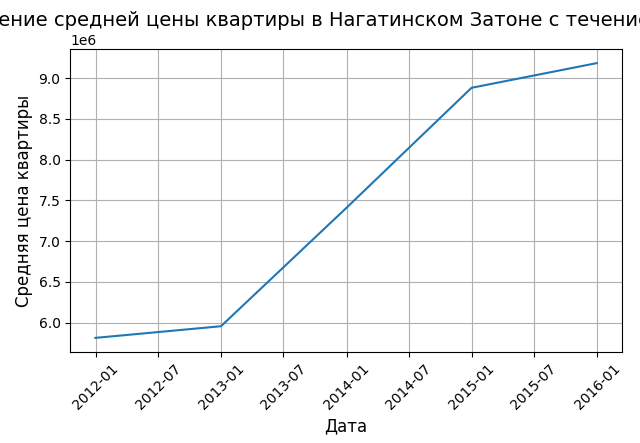

2. Постройте гистограмму распределения цен на квартиры с общей площадью более 50 кв.метров

In [ ]:
filtered_df = df[df['full_sq'] > 50]

plt.figure(figsize=(10, 6))
plt.hist(filtered_df['price_doc'], bins=30, color='blue', edgecolor='black')

plt.title('Распределение цен на квартиры с общей площадью > 50 кв. м.', fontsize=14)
plt.xlabel('Цена квартиры', fontsize=12)
plt.ylabel('Количество квартир', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

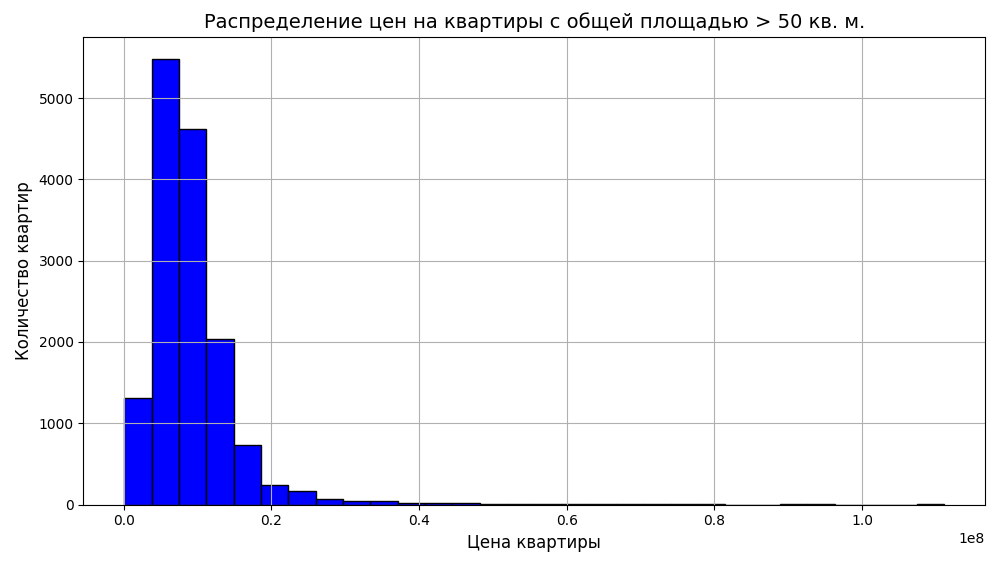

3. Визуализируйте количество проданных квартир в разных районах

In [ ]:
sold_by_area = df['sub_area'].value_counts()

# Районов слишком много, пришлось разделить на 2 графика
midpoint = len(sold_by_area) // 2
first_half = sold_by_area[:midpoint]
second_half = sold_by_area[midpoint:]

#Первый
plt.figure(figsize=(12, 6))
plt.bar(first_half.index, first_half.values, edgecolor='black')
plt.title('Количество проданных квартир (Первая половина районов)', fontsize=14)
plt.xlabel('Район', fontsize=12)
plt.ylabel('Количество проданных квартир', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Второй
plt.figure(figsize=(12, 6))
plt.bar(second_half.index, second_half.values, edgecolor='black')
plt.title('Количество проданных квартир (Вторая половина районов)', fontsize=14)
plt.xlabel('Район', fontsize=12)
plt.ylabel('Количество проданных квартир', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

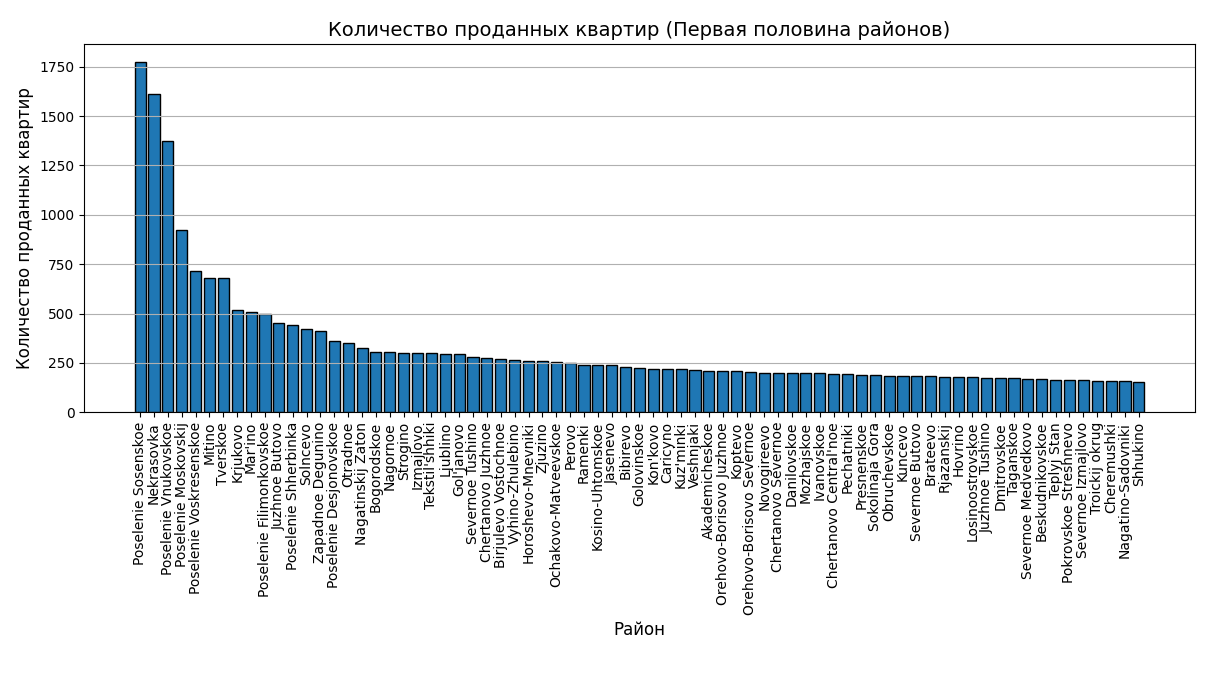

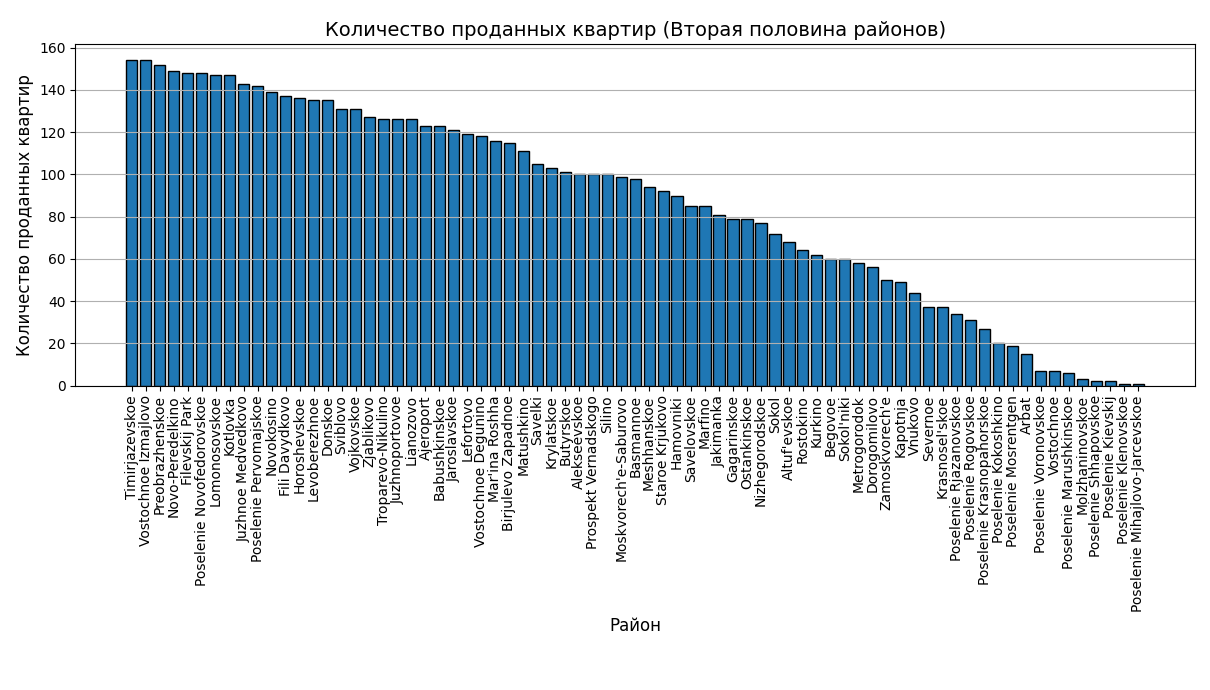

4. Постройте box plot отображающий распределение полных площадей квартир в Басманном районе

In [ ]:
basmanniy_df = df[df['sub_area'] == 'Basmannoe']

plt.figure(figsize=(8, 6))
sns.boxplot(y=basmanniy_df['full_sq'])

plt.title('Распределение полной площади квартир в Басманном районе', fontsize=14)
plt.ylabel('Полная площадь (кв.м)', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

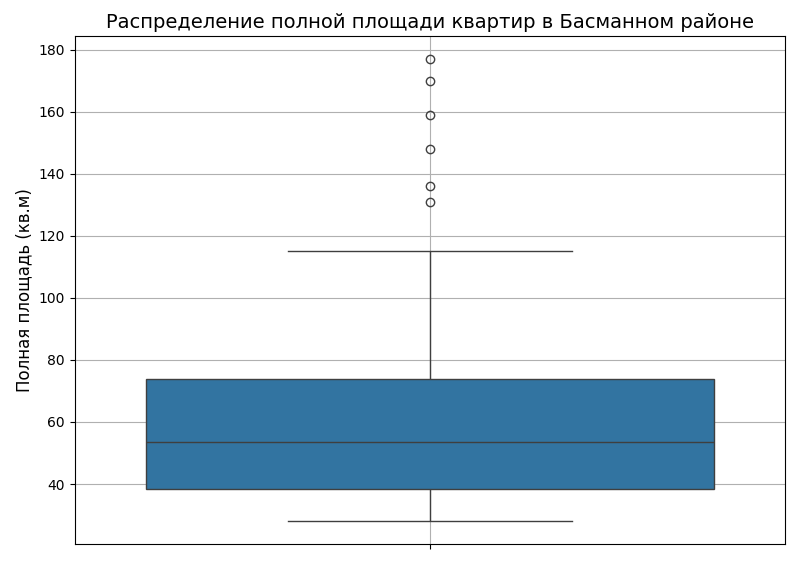

5. Визуализируйте зависимость средней стоимости квартир в зависимости от этажа

In [ ]:
floor_price_df = df.groupby('floor')['price_doc'].mean().reset_index()
floor_price_df['floor'] = floor_price_df['floor'].astype(int)

plt.figure(figsize=(10, 6))
sns.barplot(x='floor', y='price_doc', data=floor_price_df)
plt.title('Зависимость средней стоимости квартир от этажа', fontsize=14)
plt.xlabel('Этаж', fontsize=12)
plt.ylabel('Средняя стоимость квартиры', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

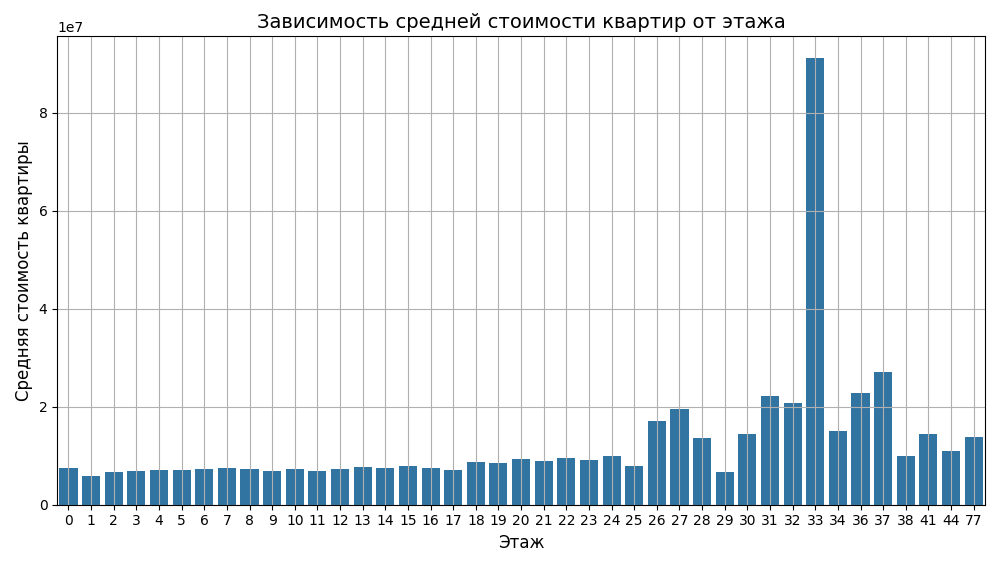

6. Покажите как меняется средняя площадь квартир в зависимости от района

In [ ]:
area_sq_df = df.groupby('sub_area')['full_sq'].mean().reset_index()

midpoint = len(area_sq_df) // 2
first_half = area_sq_df[:midpoint]
second_half = area_sq_df[midpoint:]

plt.figure(figsize=(14, 8))
sns.barplot(x='sub_area', y='full_sq', data=first_half)
plt.title('Средняя площадь квартир (Первая половина районов)', fontsize=14)
plt.xlabel('Район', fontsize=12)
plt.ylabel('Средняя площадь квартиры (кв.м)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='sub_area', y='full_sq', data=second_half)
plt.title('Средняя площадь квартир (Вторая половина районов)', fontsize=14)
plt.xlabel('Район', fontsize=12)
plt.ylabel('Средняя площадь квартиры (кв.м)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

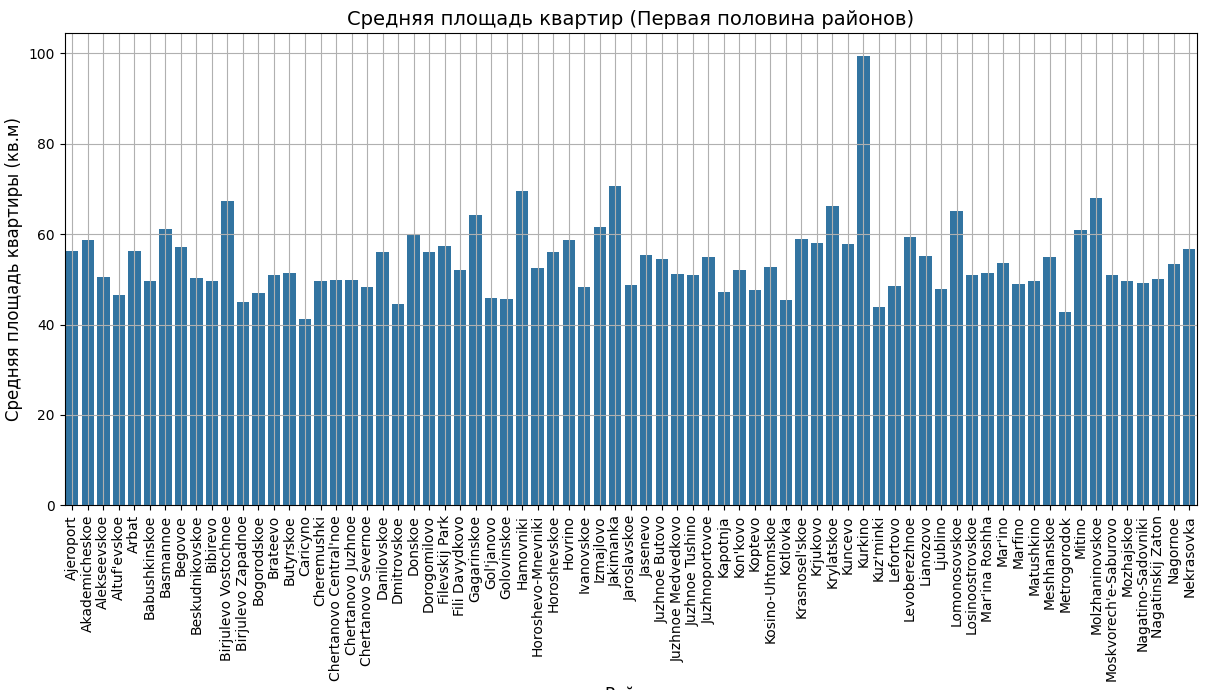

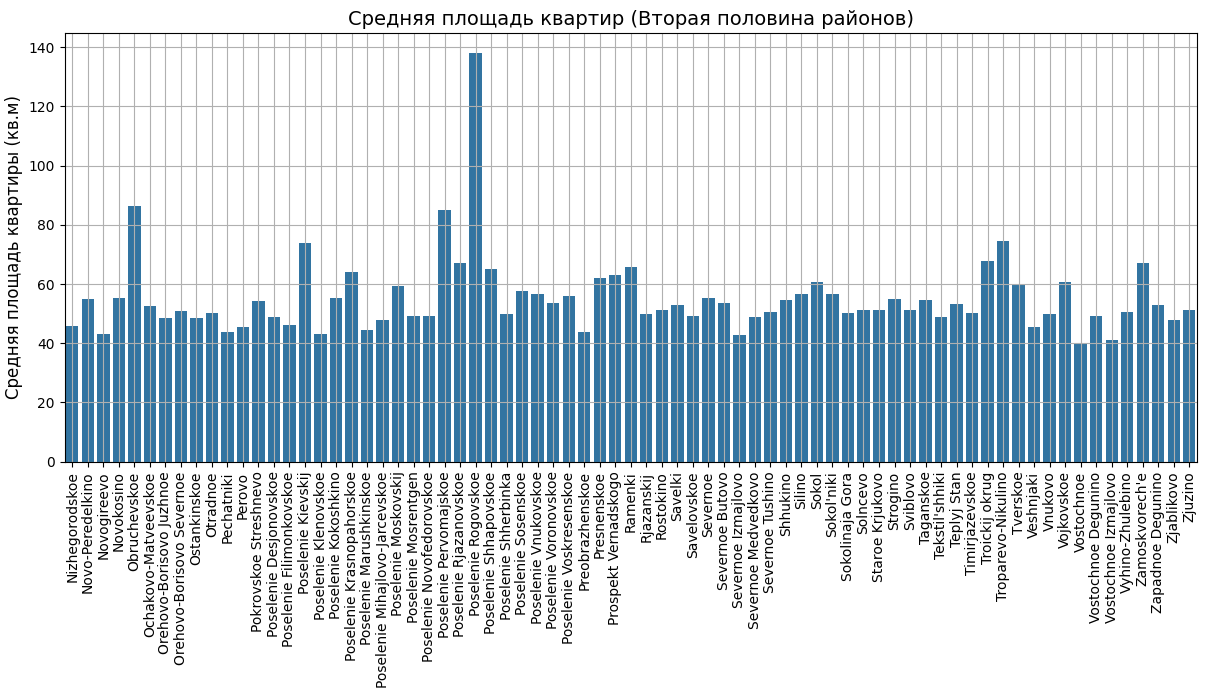

7. Постройте график изменения медианной цены на квартиру менее 50 кв. метров за период с 2011 до 2014 года*

\* Задание на доп. балл